# Endometriosis - PLOTS
# Cells - all datasets

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = 'figures/DEGs/'

sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

# Read in dataset

In [2]:
path2data = '/nfs/team292/lg18/endometriosis/integrated_objects/'
adata = sc.read(path2data + 'cells_integrated.h5ad')
adata.X.shape

(390867, 17736)

### Import EPITHELIAL, MESENCHYMAL and ENDOTHELIAL annotations

In [3]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium.csv',index_col=0)
annot_all = annot_df['Mareckova_celltype'].to_dict()
annot = dict(annot_all)
adata.obs['Mareckova_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_celltype'].value_counts())

annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_epithelial_CLEAN.csv',index_col=0)
annot_df.at[annot_df['Mareckova_epi_celltype'] == 'Hormones', 'Mareckova_epi_celltype'] = 'eHormones'
annot_df.at[annot_df['Mareckova_epi_celltype'] == 'Hormones_secretory', 'Mareckova_epi_celltype'] = 'eHormones'
annot_df.head()
annot1 = annot_df['Mareckova_epi_celltype'].to_dict()
annot.update(annot1)


annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_mesenchymal_CLEAN.csv',index_col=0)
annot_df.at[annot_df['Mareckova_mesen_celltype'] == 'Hormones', 'Mareckova_mesen_celltype'] = 'sHormones'
annot_df.head()
annot2 = annot_df['Mareckova_mesen_celltype'].to_dict()
annot.update(annot2)

annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_endothelial.csv',index_col=0)
annot_df.head()
annot2 = annot_df['Mareckova_endo_celltype'].to_dict()
annot.update(annot2)



annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_immune.csv',index_col=0)
annot_df.head()
annot2 = annot_df['immune_subcluster_labels'].to_dict()
annot.update(annot2)


adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,39,40,41,42,46,47,55,56,58,59,60,62,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Mesen_dStromal          96529
Mesen_eStromal          79488
Immune_Lymphoid         34456
Epi_SOX9                32015
Epi_Glandular           27887
Endothelial             23519
Epi_preGlandular        16765
Epi_Luminal             14253
Epi_Horm                11490
Mesen_ePV               11325
Immune_Myeloid          11260
LowQC                    7549
Epi_Ciliated             7467
Doublet                  5616
Mesen_mPV                4618
Mesen_uSMCs              2995
Epi_endocervix_MUC5B     1748
Epi_Glands                952
Mesen_FibBasalis          539
Epi_cervix_KRT5           396
Name: Mareckova_celltype, dtype: int64


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (15,19,21,22,23,24,25,39,40,41,46,47,60,61,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (13,15,17,18,19,21,22,23,24,25,41,42,46,55,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


eStromal           55612
dStromal_mid       43790
Mesen_dStromal     22381
dStromal_early     16804
Venous             15494
                   ...  
cDC1                 188
dHormones            172
Plasma_B_Cell         89
Red_Blood_Cell        43
Epi_cervix_KRT5       23
Name: celltype, Length: 74, dtype: int64


In [4]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium.csv',index_col=0)
annot = annot_df['Mareckova_lineage'].to_dict()


adata.obs['Mareckova_lineage'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_lineage'].value_counts())

Mesen          195494
Epi            112973
Immune          45716
Endothelial     23519
LowQC            7549
Doublet          5616
Name: Mareckova_lineage, dtype: int64


### Remove lowQC and doublets

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Mareckova_celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Mareckova_lineage' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


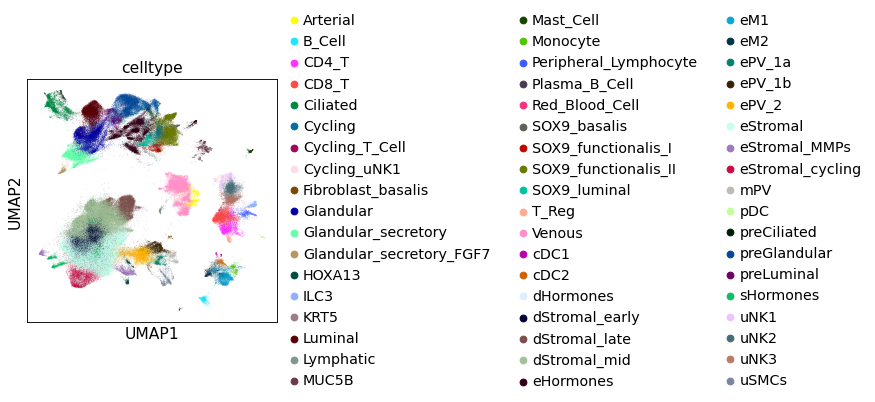

In [5]:
adata = adata[[ i not in ['Doublet', 'LowQC', 'Other'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'Epi_' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Mesen_' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Immune' not in i for i in adata.obs['celltype'] ]]
sc.pl.umap(adata, color=['celltype'])

## Normalise

In [6]:
sc.pp.filter_genes(adata, min_cells = 5) # custom so that you don;t lose your gene
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:12): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
adata.X.shape

(300133, 17736)

In [8]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


# DEGs within ENDOTHELIAL

In [9]:
endothelials = ['Arterial',
'Venous',
'Lymphatic']

In [10]:
adataDown = adata[[ "Endo" in i for i in adata.obs.Mareckova_lineage ]]
adataDown = adataDown[[ i in endothelials for i in adataDown.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Venous       14375
Arterial      1641
Lymphatic      418
Name: celltype, dtype: int64

In [11]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)

### Downsample to the smallest pop size
target_cells = 500

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 5240 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 741 genes that are detected in less than 5 cells
filtered out 3345 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


Arterial     500
Venous       500
Lymphatic    303
Name: celltype, dtype: int64


In [12]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [13]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 13650 1303 
metadata(0):
assays(1): X
rownames(13650): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(1303): HCA_A_RepT_RNA13247830_AAACGGGGTAAATGTG-Mareckova
  HCA_A_RepT_RNA13247830_AAAGATGAGCTGATAA-Mareckova ...
  GSM5572240_GTTAGACAGGGCCTCT-Lai GSM5572240_TTTCGATAGTAGATCA-Lai
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [14]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [15]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
GJA4,1.393120e-163,2.352341,0.796,0.060,1.901608e-159,Arterial,GJA4
SRP14,7.465154e-151,2.155916,1.000,0.998,1.018994e-146,Arterial,SRP14
EFNB2,1.449242e-145,2.012652,0.906,0.284,1.978215e-141,Arterial,EFNB2
SEMA3G,6.732491e-131,1.437232,0.610,0.011,9.189850e-127,Arterial,SEMA3G
AQP1,1.269774e-125,2.221084,0.976,0.471,1.733241e-121,Arterial,AQP1
...,...,...,...,...,...,...,...
LPIN11,9.913631e-01,0.006898,0.184,0.187,1.000000e+00,Venous,LPIN1
INTS41,9.920543e-01,0.008481,0.130,0.131,1.000000e+00,Venous,INTS4
UBE2Q11,9.926715e-01,0.004830,0.456,0.452,1.000000e+00,Venous,UBE2Q1
YBEY1,9.935624e-01,0.030669,0.230,0.235,1.000000e+00,Venous,YBEY


In [16]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/endothelial_DEGs.tsv', index=False, sep='\t')

# DEGs within EPITHELIALS

In [17]:
epithelials = ['preCiliated',
'SOX9_basalis',
'SOX9_functionalis_I',
'SOX9_functionalis_II',
'SOX9_luminal',
'SOX9_basalis',
'Ciliated',
'preGlandular',
'preLuminal',
'Glandular',
'Luminal',
'Glandular_secretory',
'Glandular_secretory_FGF7']

In [18]:
adataDown = adata[[ "Epi" in i for i in adata.obs.Mareckova_lineage ]]
adataDown = adataDown[[ i in epithelials for i in adataDown.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Glandular                   12827
SOX9_functionalis_II        12261
preGlandular                11663
Luminal                     10129
Glandular_secretory          8439
Ciliated                     3942
preLuminal                   2655
SOX9_luminal                 2210
SOX9_functionalis_I          1569
Glandular_secretory_FGF7      768
SOX9_basalis                  352
preCiliated                    59
Name: celltype, dtype: int64

In [19]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)

### Downsample to the smallest pop size
target_cells = 500

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 10549 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 161 genes that are detected in less than 5 cells
filtered out 1364 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


Ciliated                    500
Glandular                   500
Glandular_secretory         500
Luminal                     500
SOX9_functionalis_I         500
SOX9_functionalis_II        500
SOX9_luminal                500
preGlandular                500
preLuminal                  500
SOX9_basalis                347
Glandular_secretory_FGF7    272
preCiliated                  58
Name: celltype, dtype: int64


In [20]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [21]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 16211 5177 
metadata(0):
assays(1): X
rownames(16211): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(5177): HCA_A_RepT_RNA13247830_AGTGAGGGTGTCGCTG-Mareckova
  HCA_A_RepT_RNA13247830_CATGACATCGCACTCT-Mareckova ...
  GSM6605436_TTTGGTTGTTGCGTAT-Huang GSM6605436_TTTGTTGGTCTAACGT-Huang
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [22]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [23]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
TPPP3,0.000000,3.712861,0.962,0.079,0.0,Ciliated,TPPP3
C20orf85,0.000000,3.694381,0.960,0.051,0.0,Ciliated,C20orf85
C9orf24,0.000000,3.458541,0.940,0.042,0.0,Ciliated,C9orf24
C1orf194,0.000000,3.374081,0.954,0.063,0.0,Ciliated,C1orf194
C11orf88,0.000000,3.315326,0.930,0.043,0.0,Ciliated,C11orf88
...,...,...,...,...,...,...,...
CXorf565,0.997200,0.003055,0.168,0.171,1.0,preLuminal,CXorf56
ADO5,0.997258,0.001057,0.110,0.111,1.0,preLuminal,ADO
SYK5,0.998477,0.001487,0.226,0.227,1.0,preLuminal,SYK
ZNF4267,0.999019,0.010471,0.254,0.257,1.0,preLuminal,ZNF426


In [24]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/epithelial_DEGs.tsv', index=False, sep='\t')

In [25]:
# topgenes_DEGs = dict(zip(topgenes_DEGs.names, map(list,list(topgenes_DEGs)))) # this is to convert into a dictionary for plotting
# for i in topgenes_DEGs.keys():
#     topgenes_DEGs[i] = [value for value in topgenes_DEGs[i] if value in adata.var_names] 
    

    
# sc.pl.dotplot(adata, topgenes_DEGs, groupby='celltype', standard_scale = 'var')

# DEGs within MESENCHYMALs

In [26]:
mesenchymal = ['ePV_2',
'eStromal',
'eStromal_MMPs',
'ePV_1a',
'ePV_1b',
'Fibroblast_basalis',
'dStromal_early',
'dStromal_mid',
'dStromal_late'
]

In [27]:
adataDown = adata[[ i in mesenchymal for i in adata.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


eStromal              54645
dStromal_mid          43445
dStromal_early        16751
dStromal_late         12032
ePV_2                  6648
eStromal_MMPs          3987
ePV_1b                 2411
ePV_1a                 1375
Fibroblast_basalis      416
Name: celltype, dtype: int64

In [28]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)


### Downsample to the smallest pop size
target_cells = 1000

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 30528 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 11 genes that are detected in less than 5 cells
filtered out 1080 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


dStromal_early        1000
dStromal_late         1000
dStromal_mid          1000
ePV_1b                1000
ePV_2                 1000
eStromal              1000
eStromal_MMPs         1000
ePV_1a                 932
Fibroblast_basalis     252
Name: celltype, dtype: int64


In [29]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [30]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 16645 8184 
metadata(0):
assays(1): X
rownames(16645): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(8184): HCA_A_RepT_RNA13247830_AAACCTGTCAGCCTAA-Mareckova
  HCA_A_RepT_RNA13247830_AAACGGGTCTCGCTTG-Mareckova ...
  GSM5572240_TTTGATCTCCTCTTTC-Lai GSM5572240_TTTGGTTCATCGATGT-Lai
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [31]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [32]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
PTGIS,1.214078e-248,1.096971,0.369,0.017,2.020833e-244,Fibroblast_basalis,PTGIS
PRELP,7.241426e-191,1.855427,0.710,0.113,1.205335e-186,Fibroblast_basalis,PRELP
DPT,6.225307e-182,1.951455,0.635,0.099,1.036202e-177,Fibroblast_basalis,DPT
C7,3.582726e-135,2.076763,0.341,0.032,5.963447e-131,Fibroblast_basalis,C7
RSPO1,1.522367e-125,0.690542,0.337,0.034,2.533980e-121,Fibroblast_basalis,RSPO1
...,...,...,...,...,...,...,...
THSD7A3,8.159274e-01,0.001432,0.145,0.144,1.000000e+00,eStromal_MMPs,THSD7A
RIPOR22,8.240527e-01,0.015619,0.130,0.133,1.000000e+00,eStromal_MMPs,RIPOR2
COL6A24,8.389284e-01,0.128109,0.916,0.981,1.000000e+00,eStromal_MMPs,COL6A2
LTBP44,8.928536e-01,0.024978,0.740,0.764,1.000000e+00,eStromal_MMPs,LTBP4


In [33]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/mesenchymal_DEGs.tsv', index=False, sep='\t')

In [34]:
# topgenes_DEGs = dict(zip(topgenes_DEGs.names, map(list,list(topgenes_DEGs)))) # this is to convert into a dictionary for plotting
# for i in topgenes_DEGs.keys():
#     topgenes_DEGs[i] = [value for value in topgenes_DEGs[i] if value in adata.var_names] 
    

    
# sc.pl.dotplot(adata, topgenes_DEGs, groupby='celltype', standard_scale = 'var')

In [35]:
sDEGs = DEGs[ DEGs.p_val_adj < 0.05 ]
sDEGs = sDEGs[ sDEGs.avg_log2FC > 1 ]
sDEGs = sDEGs[ sDEGs['pct.2'] < 0.5 ]
sDEGs.cluster.value_counts()

ePV_1a                107
ePV_1b                 45
dStromal_late          32
Fibroblast_basalis     31
eStromal_MMPs          29
eStromal               10
dStromal_mid            9
ePV_2                   9
dStromal_early          6
Name: cluster, dtype: int64

In [36]:
sDEGs[ ['dStromal' in i for i in sDEGs.cluster] ]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
MME,0.000000e+00,1.494917,0.935,0.411,0.000000e+00,dStromal_early,MME
CALB2,0.000000e+00,1.336884,0.369,0.029,0.000000e+00,dStromal_early,CALB2
GDF7,4.536021e-289,1.212384,0.889,0.390,7.550207e-285,dStromal_early,GDF7
TMEM196,9.035000e-280,1.022214,0.615,0.150,1.503876e-275,dStromal_early,TMEM196
JAZF1,9.418707e-240,1.073990,0.829,0.403,1.567744e-235,dStromal_early,JAZF1
ALDH1A3,3.650259e-195,1.097048,0.621,0.214,6.075856e-191,dStromal_early,ALDH1A3
IGFBP1,0.000000e+00,4.249919,0.643,0.043,0.000000e+00,dStromal_late,IGFBP1
CXCL8,0.000000e+00,2.836051,0.741,0.130,0.000000e+00,dStromal_late,CXCL8
TNFAIP3,0.000000e+00,2.258685,0.909,0.288,0.000000e+00,dStromal_late,TNFAIP3
ARC,0.000000e+00,1.959685,0.704,0.077,0.000000e+00,dStromal_late,ARC


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


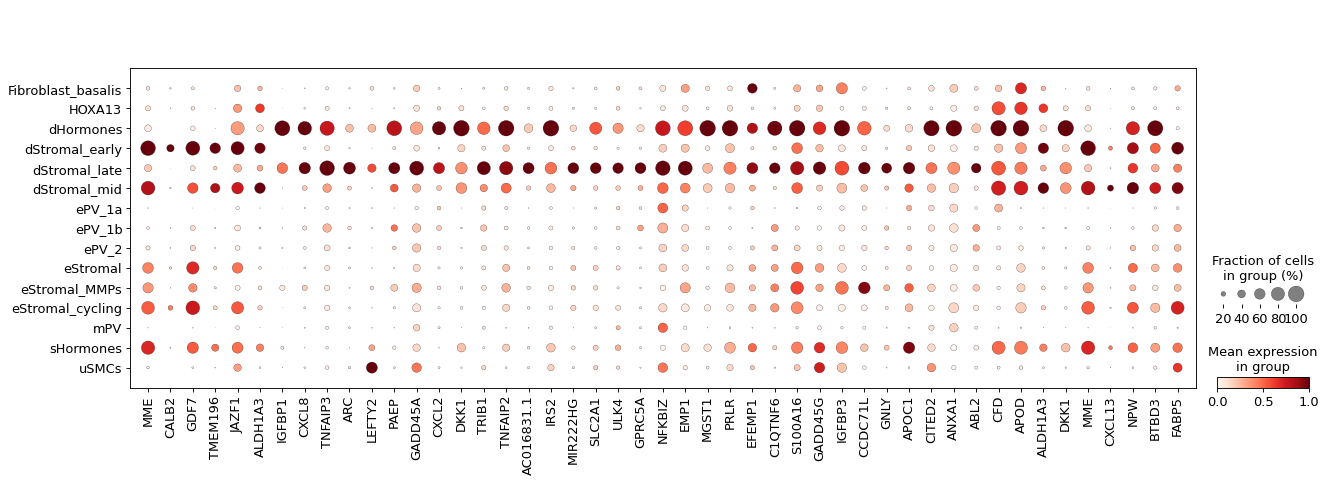

In [37]:
sc.pl.dotplot( adata[[ 'Mesen' in i for i in adata.obs.Mareckova_lineage ]] , sDEGs[ ['dStromal' in i for i in sDEGs.cluster] ].gene, groupby='celltype', standard_scale='var')

# DEGs within STROMAL

In [38]:
mesenchymal = [
    'eStromal',
    'eStromal_MMPs',
    'dStromal_early',
    'dStromal_mid',
    'dStromal_late'
]

In [39]:
adataDown = adata[[ i in mesenchymal for i in adata.obs.celltype ]] 
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


eStromal          54645
dStromal_mid      43445
dStromal_early    16751
dStromal_late     12032
eStromal_MMPs      3987
Name: celltype, dtype: int64

In [40]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)


### Downsample to the smallest pop size
target_cells = 2000

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 28503 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 13 genes that are detected in less than 5 cells
filtered out 929 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


dStromal_early    2000
dStromal_late     2000
dStromal_mid      2000
eStromal          2000
eStromal_MMPs     2000
Name: celltype, dtype: int64


In [41]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [42]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 16794 10000 
metadata(0):
assays(1): X
rownames(16794): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(10000): HCA_A_RepT_RNA13247830_CCTACACTCATCTGTT-Mareckova
  HCA_A_RepT_RNA13247830_CCTTTCTCAAGCGATG-Mareckova ...
  GSM5572240_TTTGGTTCATCGATGT-Lai GSM5572240_TTTGGTTTCTGCTTAT-Lai
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [43]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [44]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
FN1,0.000000,1.881422,0.959,0.709,0.0,dStromal_early,FN1
CALB2,0.000000,1.311614,0.372,0.043,0.0,dStromal_early,CALB2
IGF1,0.000000,1.250483,0.997,0.811,0.0,dStromal_early,IGF1
REV3L,0.000000,1.218163,0.973,0.789,0.0,dStromal_early,REV3L
RORB,0.000000,1.116327,0.970,0.835,0.0,dStromal_early,RORB
...,...,...,...,...,...,...,...
AC020916.12,0.833450,0.094090,0.482,0.500,1.0,eStromal,AC020916.1
RAB321,0.858456,0.010352,0.442,0.437,1.0,eStromal,RAB32
SLC35E3,0.944488,0.000131,0.216,0.216,1.0,eStromal,SLC35E3
KHDRBS32,0.948850,0.002648,0.237,0.236,1.0,eStromal,KHDRBS3


In [45]:
DEGs.to_csv('DEGs/dStromalMid_vs_dStromalLate.tsv', index=False, sep='\t')
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/stromal_DEGs.tsv', index=False, sep='\t')

In [46]:
# topgenes_DEGs = dict(zip(topgenes_DEGs.names, map(list,list(topgenes_DEGs)))) # this is to convert into a dictionary for plotting
# for i in topgenes_DEGs.keys():
#     topgenes_DEGs[i] = [value for value in topgenes_DEGs[i] if value in adata.var_names] 
    

    
# sc.pl.dotplot(adata, topgenes_DEGs, groupby='celltype', standard_scale = 'var')

In [47]:
sDEGs = DEGs[ DEGs.p_val_adj < 0.05 ]
sDEGs = sDEGs[ sDEGs.avg_log2FC > 0.75 ]
sDEGs = sDEGs[ sDEGs['pct.2'] < 0.5 ]
sDEGs.cluster.value_counts()

dStromal_late     73
eStromal          16
dStromal_early     7
dStromal_mid       6
Name: cluster, dtype: int64

In [48]:
sDEGs[ ['dStromal_late' in i for i in sDEGs.cluster] ]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
IGFBP1,0.000000e+00,4.074971,0.654,0.065,0.000000e+00,dStromal_late,IGFBP1
CXCL8,0.000000e+00,2.691317,0.743,0.156,0.000000e+00,dStromal_late,CXCL8
TNFAIP3,0.000000e+00,2.301087,0.922,0.304,0.000000e+00,dStromal_late,TNFAIP3
PAEP,0.000000e+00,2.215313,0.725,0.228,0.000000e+00,dStromal_late,PAEP
ARC,0.000000e+00,2.021384,0.705,0.074,0.000000e+00,dStromal_late,ARC
...,...,...,...,...,...,...,...
MEG8,1.016971e-180,0.790800,0.650,0.343,1.707901e-176,dStromal_late,MEG8
KDM6B,3.031457e-178,0.782646,0.738,0.484,5.091028e-174,dStromal_late,KDM6B
CRIP11,7.554651e-153,0.773757,0.726,0.453,1.268728e-148,dStromal_late,CRIP1
CYTOR,6.611093e-143,0.755532,0.578,0.305,1.110267e-138,dStromal_late,CYTOR


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


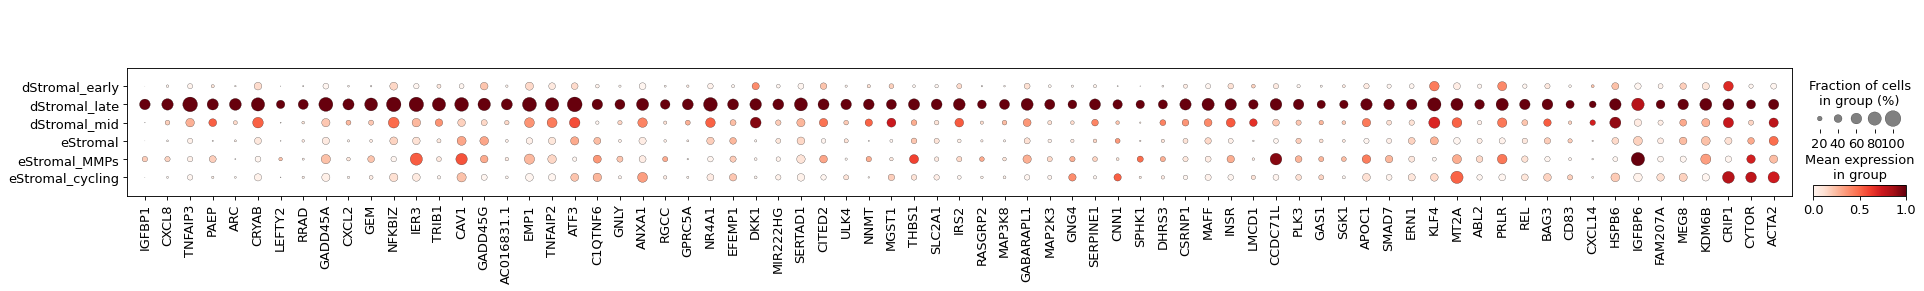

In [49]:
sc.pl.dotplot( adata[[ 'Stromal' in i for i in adata.obs.celltype ]] , sDEGs[ ['dStromal_late' in i for i in sDEGs.cluster] ].gene, groupby='celltype', standard_scale='var')

# DEGs within Immune

In [50]:
adataDown = adata[["Immune" in i for i in adata.obs.Mareckova_lineage ]]
adataDown = adataDown[[ i in ["G1"] for i in adataDown.obs.phase ]] 
adataDown = adataDown[[ 'Cycling' not in i for i in adataDown.obs.celltype ]]
adataDown = adataDown[[ 'Red_Blood_Cell' not in i for i in adataDown.obs.celltype ]]  
adataDown.obs['celltype'].value_counts()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


CD8_T                    5370
uNK2                     4284
CD4_T                    4132
eM1                      3760
uNK3                     3469
eM2                      1524
uNK1                     1332
B_Cell                   1162
Peripheral_Lymphocyte    1073
ILC3                      818
cDC2                      643
Monocyte                  640
T_Reg                     636
Mast_Cell                 460
pDC                       219
cDC1                      172
Plasma_B_Cell              87
Name: celltype, dtype: int64

In [51]:
import anndata
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)


### Downsample to the smallest pop size
target_cells = 200

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['celltype'].value_counts())

del adata_downsampled
del adatas

filtered out 22135 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 1325 genes that are detected in less than 5 cells
filtered out 2052 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


uNK3                     200
eM2                      200
CD8_T                    200
ILC3                     200
Monocyte                 200
uNK2                     200
uNK1                     200
CD4_T                    200
cDC2                     200
eM1                      200
Mast_Cell                169
pDC                      151
B_Cell                   148
cDC1                     131
Peripheral_Lymphocyte     86
T_Reg                     70
Plasma_B_Cell             31
Name: celltype, dtype: int64


In [52]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [53]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 14359 2786 
metadata(0):
assays(1): X
rownames(14359): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(2786): HCA_A_RepT_RNA13247830_AACTTTCCAGTAACGG-Mareckova
  HCA_A_RepT_RNA13247830_AATCCAGTCATCTGCC-Mareckova ...
  GSM5572240_TTCGATTAGGCCCAAA-Lai GSM5572240_TTTCATGCAATTTCTC-Lai
colData names(59): library StudyName ... Mareckova_lineage cell
reducedDimNames(0):
altExpNames(0):


In [54]:
%%R -o DEGs

library(Seurat)
so = as.Seurat(adataDown, counts = "X", data = "X")
Idents(so) = so$celltype

# # Normalize
# so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)
# so <- ScaleData(so, features = rownames(so))

# Extract DEGs for each cell_type
DEGs <- FindAllMarkers(so, 
                       verbose = F, 
                       only.pos = T, 
                       random.seed = 1, 
                       logfc.threshold = 0, 
                       min.pct = 0.1, 
                       return.thresh = 1)

DEGs$cluster = factor(DEGs$cluster, levels = sort(unique(DEGs$cluster)) )
# topgenes_DEGs = subset(DEGs, qval <= 0.05) %>%
#   group_by(cluster) %>%
#   group_map(~ head(.x, 30L)$gene) %>%
#   unlist(.)

In [55]:
DEGs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
MS4A1,0.000000e+00,3.276911,0.966,0.023,0.000000e+00,B_Cell,MS4A1
CD79A,0.000000e+00,3.183044,0.973,0.043,0.000000e+00,B_Cell,CD79A
VPREB3,0.000000e+00,2.438913,0.764,0.007,0.000000e+00,B_Cell,VPREB3
TNFRSF13C,0.000000e+00,2.005676,0.818,0.013,0.000000e+00,B_Cell,TNFRSF13C
PAX5,2.538850e-307,1.140351,0.601,0.005,3.645535e-303,B_Cell,PAX5
...,...,...,...,...,...,...,...
CD527,9.981325e-01,0.108662,0.700,0.778,1.000000e+00,uNK3,CD52
EMC69,9.988180e-01,0.025259,0.340,0.367,1.000000e+00,uNK3,EMC6
BCR6,9.991833e-01,0.020762,0.105,0.106,1.000000e+00,uNK3,BCR
GLRX57,9.993845e-01,0.029197,0.375,0.405,1.000000e+00,uNK3,GLRX5


In [56]:
DEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/immune_DEGs.tsv', index=False, sep='\t')